# Importing Python Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import plotly.express as px
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score

In [3]:
df=pd.read_csv('D:/Fifth year/Data Mining/US_Accidents_March23_sampled_500k.csv')

# EDA Analysis

In [4]:
df.head()

ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0         NaN         0.000  ...      False   False  False           False   
1  -77.398282         0.056  ...      False   False  False           False   
2 -120.492442         0.022  ...      False   False  False           False   
3  -92.972223         1.054  ...      False   False  False           False   
4 -118.985995         0.046  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
0           True        False            Day            Day               Day   
1          False        False          Night          Night             Night   
2           True        False            Day            Day               Day   
3          False        False            Day            Day               Day   
4          False        False          Night          Night             Night   

  Astronomical_Twilight  
0                   Day  
1                 Night  
2                   Day  
3                   Day  
4                 Night  

[5 rows x 46 columns]

ss

In [5]:
df[['Distance(mi)', 'Severity']].corr(method='spearman')

Distance(mi)  Severity
Distance(mi)       1.00000  -0.13817
Severity          -0.13817   1.00000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'],format='mixed')

In [8]:
print(df['Wind_Direction'].nunique())     

24


In [9]:
df['ID'].duplicated().sum()

0

In [10]:
print(df['Pressure(in)'].unique())               

[29.92 29.91 29.79 28.49 29.77 29.37 28.71 30.03 29.34 29.06 29.11 24.08
 29.39 29.69 28.66 29.89 29.98 29.75 30.09 30.52 28.92 29.24 30.28 29.28
 29.08 29.68 29.97 30.17 24.33 29.99 30.23 30.26 29.59 29.51 28.48 29.84
 29.5  29.36 30.14 30.02 30.08 30.04 30.11 29.93 28.87 24.64 29.72 25.61
 29.17 30.   25.66 29.65 29.61 30.12 30.2  28.82 29.52 29.44 29.26 29.47
 29.6  29.29 28.47 30.24 29.09 30.06 29.76 29.7  29.96   nan 30.35 30.07
 30.16 29.87 29.95 28.74 29.78 29.1  24.8  29.82 30.21 30.13 30.4  29.22
 28.95 26.08 29.31 30.3  25.64 30.18 30.15 29.23 29.55 29.74 27.   30.1
 30.05 29.18 29.   29.81 29.45 28.91 29.32 25.99 29.88 30.25 29.71 29.58
 24.88 29.25 29.85 28.02 29.94 29.83 27.95 28.34 29.38 29.35 29.73 28.75
 29.33 30.36 30.19 28.89 29.62 27.58 28.9  29.8  28.69 29.54 27.59 28.57
 29.16 30.51 29.9  23.91 28.98 27.73 29.07 30.22 29.14 26.79 28.67 29.64
 29.42 29.56 27.29 28.58 29.21 30.34 30.41 28.72 30.01 29.02 28.83 29.04
 28.59 29.49 23.94 28.68 29.19 29.46 30.27 27.16 28.

In [11]:
print(df['Humidity(%)'].unique())

[ 62.  48.  73.  86.  34.  58.  89.  55.  39.  78.  97.  84.  65.  40.
  37.  54.  94.  64.  75.  93.  70.  43.  72.  67.  59.  22.  38.  87.
  35.  91.  80.  41.  33.  81.  56.  71.  46.  50.  66.  61.  26.  57.
  42.  51.  85.  49. 100.  13.  88.  18.  nan  74.  76.  21.  32.  27.
  79.  77.  69.  90.  45.  92.  24.  60.  96.  44.  82.  52.  36.  23.
  68.  99.  31.  28.  16.  53.  63.  12.  20.  30.  47.  17.  83.  29.
  25.   6.  95.   7.  11.  14.  19.   9.   4.  98.   8.  15.  10.   5.
   3.   2.   1.]


In [12]:
print(df['Visibility(mi)'].unique())

[1.00e+01 9.00e+00 8.00e+00 5.00e-01      nan 6.00e+00 7.00e+00 2.00e+00
 4.00e+00 0.00e+00 5.00e+00 1.80e+00 3.00e+00 7.50e-01 2.50e-01 1.30e+01
 1.00e+00 2.50e+00 1.50e+01 4.50e+01 8.00e-01 6.00e-02 2.00e+01 1.20e+01
 1.50e+00 2.00e-01 1.20e+00 5.00e+01 7.00e+01 4.00e+01 3.00e+01 1.20e-01
 8.00e+01 2.50e+01 3.80e-01 1.20e+02 1.00e-01 3.50e+01 7.50e+01 1.90e-01
 4.00e-01 2.20e+00 6.30e-01 6.00e-01 6.00e+01 1.10e+01 1.40e+00 1.00e+02
 1.30e+02 4.20e+00 1.05e+01 2.80e+00 1.10e+00 2.30e+01 8.80e-01 7.80e+01
 7.60e+01 5.40e+01 5.50e+00 5.80e+01 9.00e-01 1.90e+00 3.50e+00 3.40e+01
 6.50e+01 7.00e-01]


In [13]:
print(df['Wind_Speed(mph)'].unique())

[  5.   13.   15.    0.   12.    7.   10.    3.   14.    4.6   5.8   6.9
   6.    3.5   9.    nan  11.5   9.2  17.   24.2  10.4  20.    8.   17.3
  12.7  18.4  13.8   8.1  27.6  18.   19.6  22.   16.   16.1  20.7  21.
  21.9  32.2  24.   32.   26.5  25.   23.   29.   26.   31.   36.   47.
   2.3  34.5  35.   39.   25.3  30.   28.   38.   28.8  39.1  58.  142.
  46.   37.   33.4  33.   31.1  35.7  29.9  52.   40.3   1.2  41.   51.
   2.    1.   40.  131.  243.   36.8  42.6  47.2  43.   44.   45.   77.
 135.8  75.  127.  822.8  41.4  49.5  82.   66.7  59.  214.   81.   70. ]


In [14]:
print(df['Temperature(F)'].unique())

[ 7.700e+01  4.500e+01  6.800e+01  2.700e+01  4.200e+01  3.500e+01
  9.000e+01  9.100e+01  6.300e+01  7.000e+01  1.300e+01  8.500e+01
  6.400e+01  8.300e+01  8.400e+01  6.440e+01  4.300e+01  6.200e+01
  6.700e+01  8.600e+01  5.500e+01  7.680e+01  5.590e+01  1.800e+01
  6.260e+01  3.700e+01  6.870e+01  6.000e+01  4.800e+01  8.000e+01
  6.100e+01  7.800e+01  7.200e+01  9.190e+01  6.500e+01  7.300e+01
  8.010e+01  7.900e+01  5.100e+01  4.900e+01  5.000e+01  8.800e+01
  4.890e+01  3.300e+01  8.700e+01  7.500e+01  3.200e+01  5.400e+01
  4.400e+01  6.600e+01  7.600e+01  9.400e+01  8.100e+01  6.030e+01
  6.910e+01  5.800e+01  2.610e+01  5.180e+01        nan  4.690e+01
  8.060e+01  6.900e+01  2.200e+01  7.340e+01  7.100e+01  3.000e+01
  7.810e+01  6.620e+01  3.900e+01  5.300e+01  9.900e+01  3.560e+01
  7.000e+00  4.600e+01  9.200e+01  8.900e+01  3.400e+01  5.200e+01
  6.980e+01  8.200e+01 -3.500e+01  9.300e+01  3.800e+01  5.700e+01
  4.100e+01  7.400e+01  2.890e+01  1.200e+01  2.500e+01  0.000

In [15]:
df['City'].value_counts()

City
Miami            12141
Houston          11031
Los Angeles      10299
Charlotte         8979
Dallas            8245
                 ...  
Newcomerstown        1
Lakehurst            1
New Concord          1
Smithmill            1
Fair Haven           1
Name: count, Length: 9488, dtype: int64

In [16]:
df['Weather_Condition'].value_counts()

Weather_Condition
Fair             166053
Mostly Cloudy     65398
Cloudy            53107
Clear             52379
Partly Cloudy     45125
                  ...  
Rain Shower           1
Light Hail            1
Light Haze            1
Sleet / Windy         1
Sand                  1
Name: count, Length: 108, dtype: int64

In [17]:
df['Severity'].value_counts()

Severity
2    398142
3     84520
4     13064
1      4274
Name: count, dtype: int64

In [18]:
df['Temperature(F)'].describe()

count    489534.000000
mean         61.646254
std          19.000133
min         -77.800000
25%          49.000000
50%          64.000000
75%          76.000000
max         207.000000
Name: Temperature(F), dtype: float64

In [19]:
df['Humidity(%)'].describe()

count    488870.000000
mean         64.834921
std          22.826158
min           1.000000
25%          48.000000
50%          67.000000
75%          84.000000
max         100.000000
Name: Humidity(%), dtype: float64

In [20]:
df['Distance(mi)'].describe()

count    500000.000000
mean          0.564317
std           1.774872
min           0.000000
25%           0.000000
50%           0.029000
75%           0.465000
max         193.479996
Name: Distance(mi), dtype: float64

In [21]:
df['Wind_Speed(mph)'].describe()

count    463013.000000
mean          7.681347
std           5.431361
min           0.000000
25%           4.600000
50%           7.000000
75%          10.400000
max         822.800000
Name: Wind_Speed(mph), dtype: float64

In [22]:
df['Visibility(mi)'].describe()

count    488709.000000
mean          9.091540
std           2.708083
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         130.000000
Name: Visibility(mi), dtype: float64

In [23]:
df['Precipitation(in)'].describe()

count    357384.000000
mean          0.008289
std           0.101865
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.130000
Name: Precipitation(in), dtype: float64

In [24]:
print(df['Visibility(mi)'].nunique())  

65


In [25]:
df['Precipitation(in)'].describe()

count    357384.000000
mean          0.008289
std           0.101865
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.130000
Name: Precipitation(in), dtype: float64

In [26]:
df['Wind_Direction'].describe()

count     488803
unique        24
top         CALM
freq       62259
Name: Wind_Direction, dtype: object

In [27]:
print(df['Wind_Direction'].unique())

['NW' 'W' 'ENE' 'CALM' 'SW' 'VAR' 'S' 'E' 'WSW' 'NNE' 'Variable' 'West'
 'N' 'ESE' 'NNW' 'North' 'SSW' 'WNW' 'NE' 'Calm' 'SE' 'East' 'SSE' 'South'
 nan]


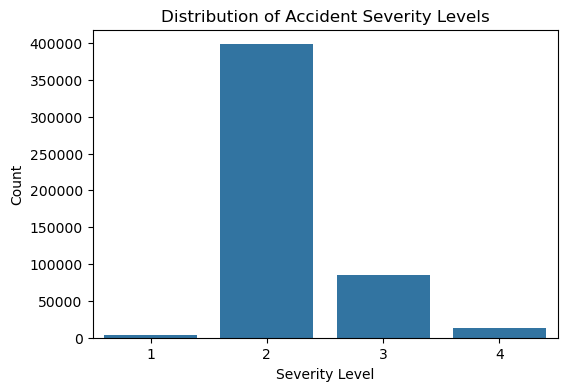

Severity
1      4274
2    398142
3     84520
4     13064
Name: count, dtype: int64


In [28]:
severity_counts = df['Severity'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title("Distribution of Accident Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

print(severity_counts)


In [29]:
# Undersamplingو Oversampling وهذا يشير الى ان المودل سينحاز للقيمة 2 اذا لم نقم بعمليات IMBALNCED هذا يعني ان الداتا غير متوازنة 

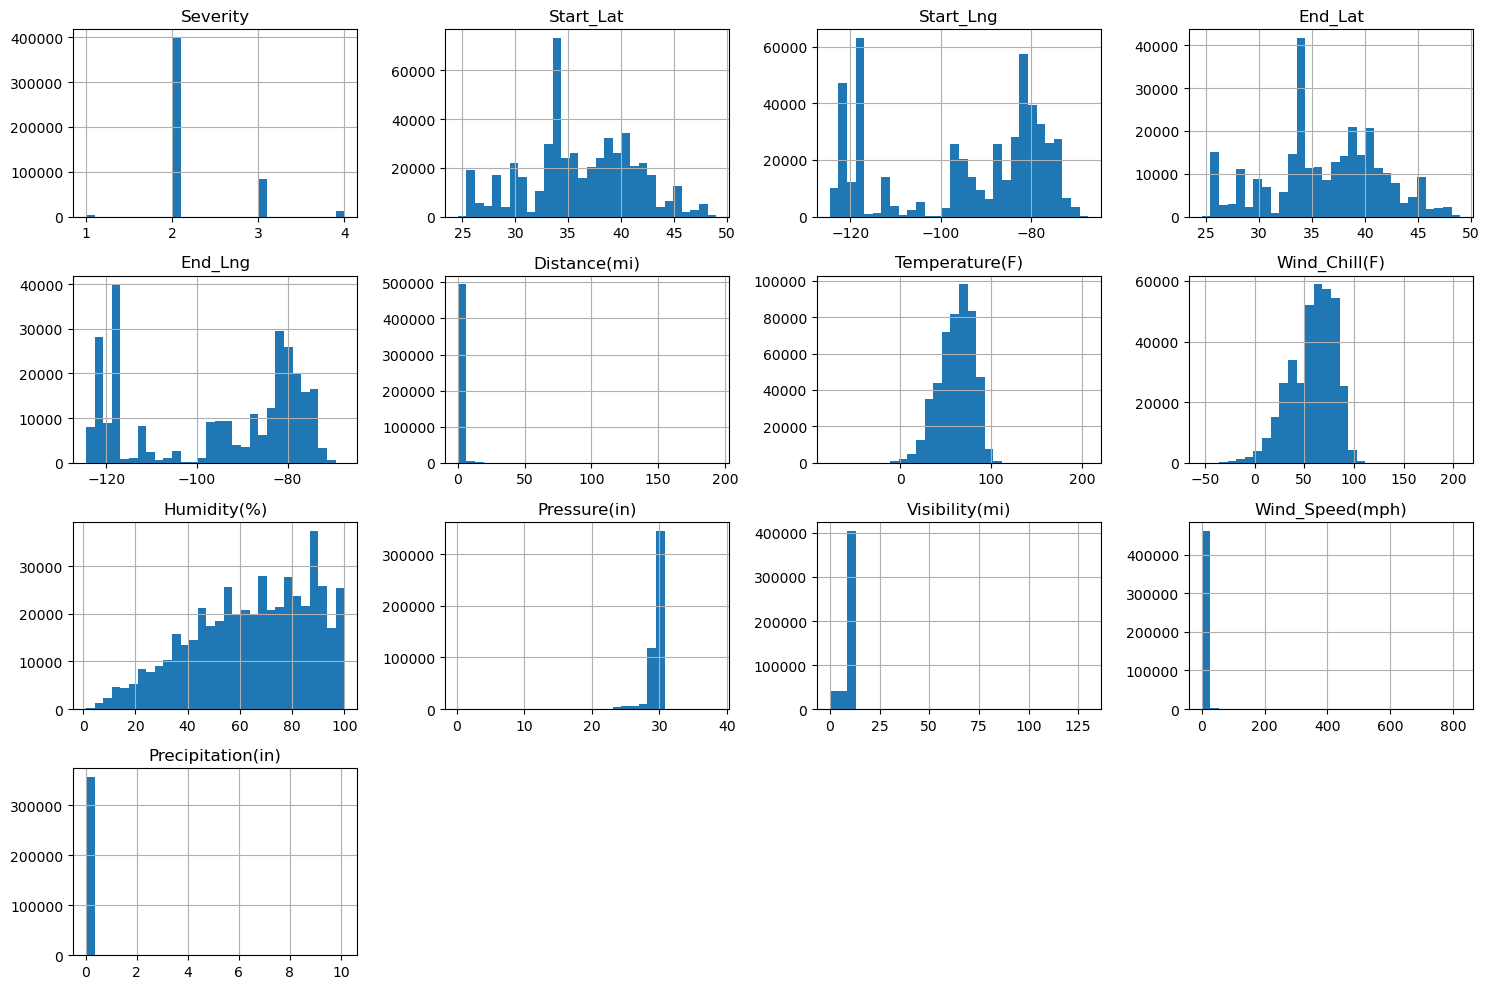

In [30]:
numeric_columns = df.select_dtypes([np.number]).columns
df[numeric_columns].hist(figsize=(15,10),bins=30)
plt.tight_layout()
plt.show()

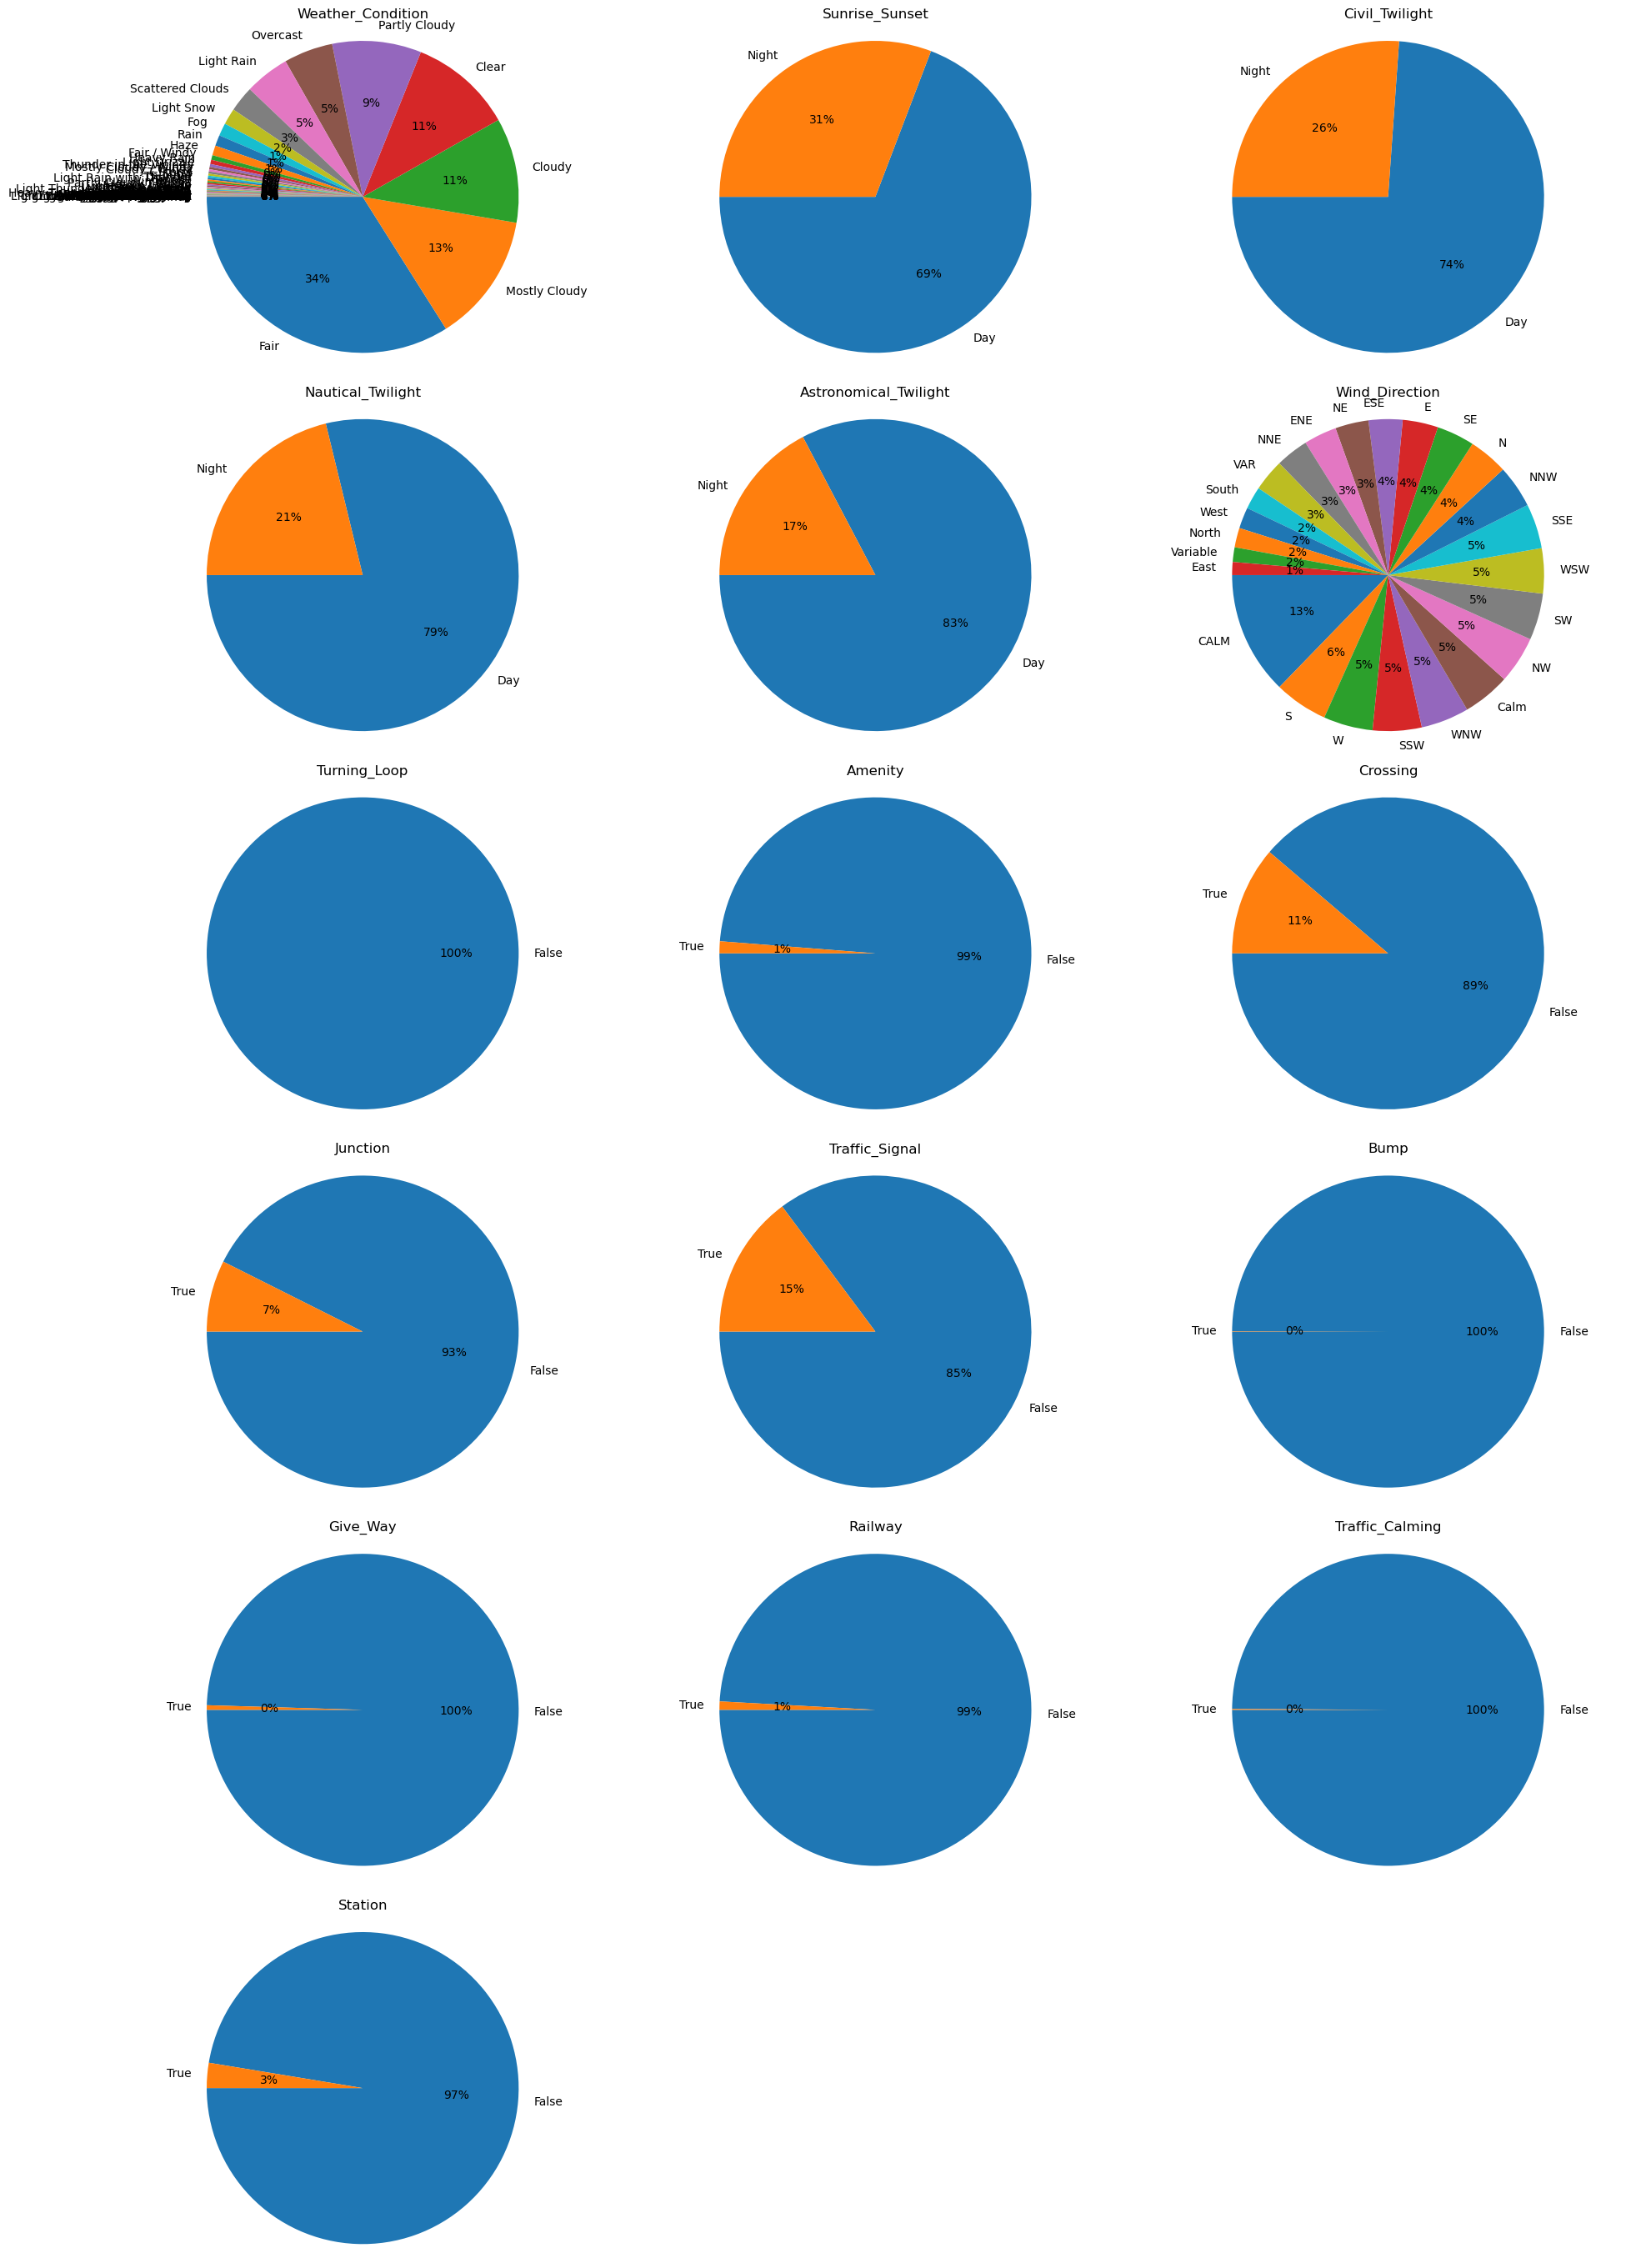

In [31]:
fig = plt.figure(figsize=(20, 50))

categorical_columns = ['Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 
                       'Nautical_Twilight', 'Astronomical_Twilight', 'Wind_Direction',
                       'Turning_Loop', 'Amenity', 'Crossing', 'Junction', 'Traffic_Signal','Bump','Give_Way','Railway','Traffic_Calming','Station']

for i, col in enumerate(categorical_columns):
    ax = fig.add_subplot(11, 3, i + 1)
    df[col].value_counts().plot(
        kind="pie",
        autopct='%1.0f%%',
        shadow=False,
        startangle=180,
        ax=ax
    )
    ax.set_title(col, fontsize=12)
    ax.set_ylabel('')  
    ax.axis('equal')  

plt.tight_layout()
plt.show()

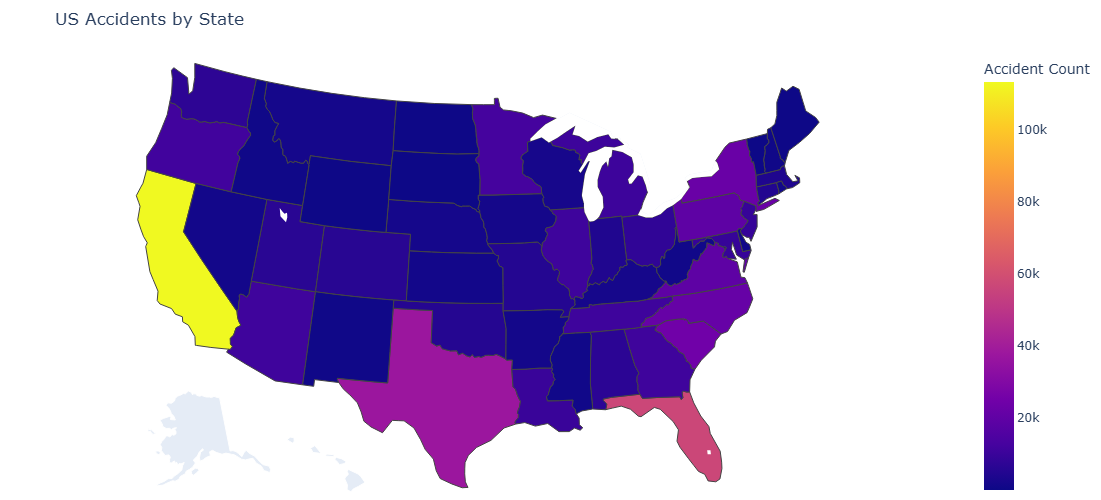

In [32]:
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Accident Count']

fig = px.choropleth(
    state_counts,
    locations='State',               
    locationmode="USA-states",
    color='Accident Count',
    color_continuous_scale='plasma',
    scope="usa",
    title="US Accidents by State",
    width=800,
    height=500
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


                       Missing Values  Percentage
End_Lat                        220377     44.0754
End_Lng                        220377     44.0754
Precipitation(in)              142616     28.5232
Wind_Chill(F)                  129017     25.8034
Wind_Speed(mph)                 36987      7.3974
Visibility(mi)                  11291      2.2582
Wind_Direction                  11197      2.2394
Humidity(%)                     11130      2.2260
Weather_Condition               11101      2.2202
Temperature(F)                  10466      2.0932
Pressure(in)                     8928      1.7856
Weather_Timestamp                7674      1.5348
Sunrise_Sunset                   1483      0.2966
Civil_Twilight                   1483      0.2966
Nautical_Twilight                1483      0.2966
Astronomical_Twilight            1483      0.2966
Airport_Code                     1446      0.2892
Street                            691      0.1382
Timezone                          507      0.1014


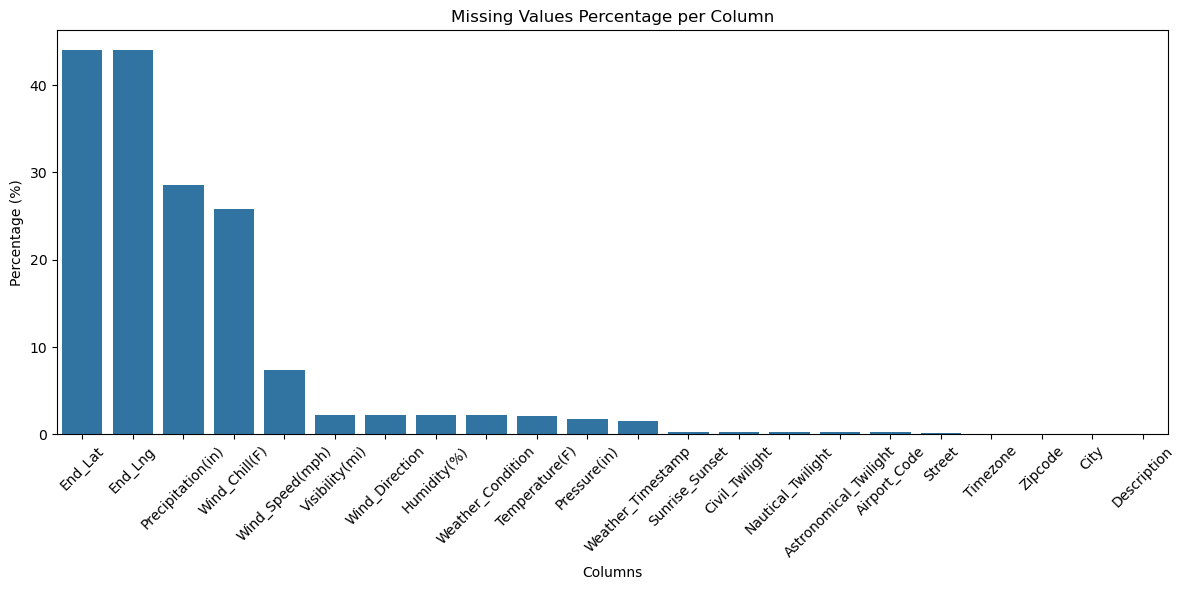

In [33]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0]  
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

print(missing_df)

plt.figure(figsize=(12,6))
sns.barplot(x=missing_df.index, y=missing_df['Percentage'])
plt.xticks(rotation=45)
plt.title("Missing Values Percentage per Column")
plt.ylabel("Percentage (%)")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()


# Correlation Analysis And Chi2

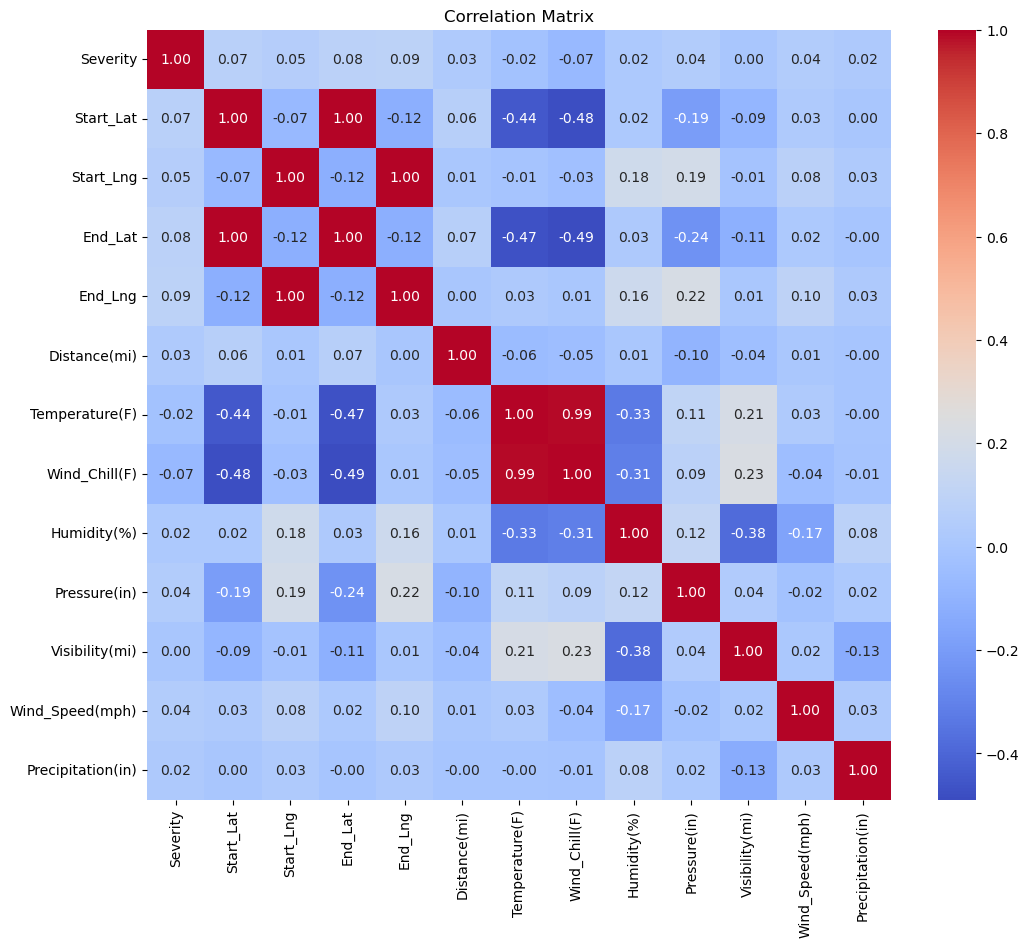

In [34]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

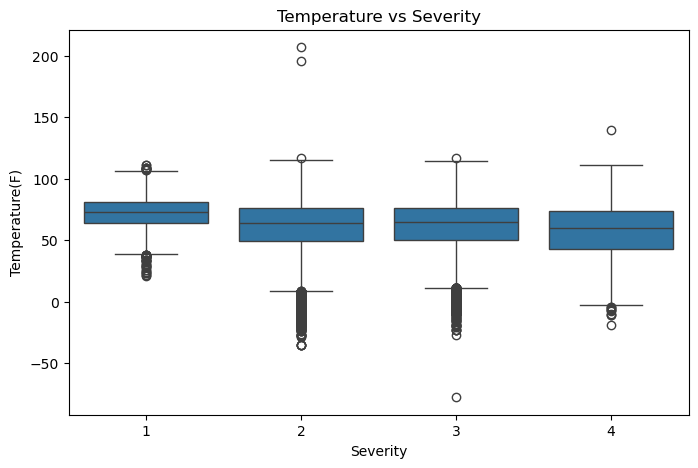

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title("Temperature vs Severity")
plt.show()

In [36]:
df['Distance(mi)'].head()

0    0.000
1    0.056
2    0.022
3    1.054
4    0.046
Name: Distance(mi), dtype: float64

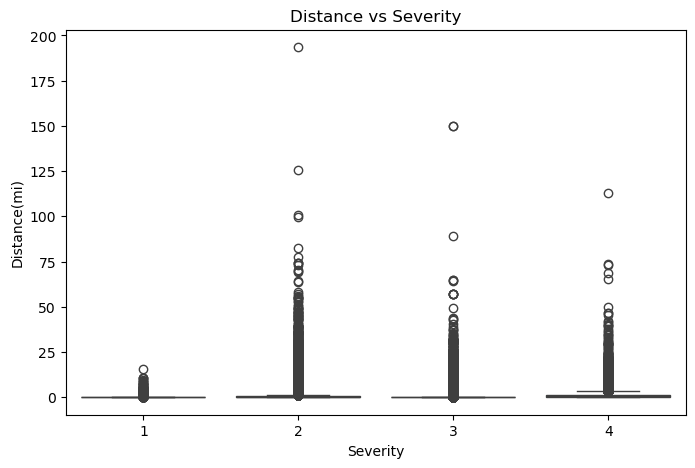

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Distance(mi)', data=df)
plt.title("Distance vs Severity")
plt.show()

In [38]:
weather_mapping = {
    # Clear
    'Fair': 'Clear', 'Clear': 'Clear', 'Mostly Clear': 'Clear', 'Mostly Sunny': 'Clear', 'Sunny': 'Clear',
    
    # Cloudy
    'Cloudy': 'Cloudy', 'Mostly Cloudy': 'Cloudy', 'Overcast': 'Cloudy', 'Scattered Clouds': 'Cloudy',
    'Partly Cloudy': 'Cloudy', 'Partly Cloudy / Windy': 'Cloudy', 'Mostly Cloudy / Windy': 'Cloudy',
    
    # Rainy
    'Rain': 'Rainy', 'Light Rain': 'Rainy', 'Heavy Rain': 'Rainy', 'Rain Shower': 'Rainy',
    'Rain Showers': 'Rainy', 'Light Rain Shower': 'Rainy', 'Light Rain Showers': 'Rainy',
    'Drizzle': 'Rainy', 'Light Drizzle': 'Rainy', 'Heavy Drizzle': 'Rainy',
    'Thunderstorms and Rain': 'Rainy', 'Light Rain with Thunder': 'Rainy',
    'Showers in the Vicinity': 'Rainy', 'Drizzle / Windy': 'Rainy',
    
    # Snowy
    'Snow': 'Snowy', 'Light Snow': 'Snowy', 'Heavy Snow': 'Snowy', 'Snow Showers': 'Snowy',
    'Light Snow Shower': 'Snowy', 'Heavy Snow / Windy': 'Snowy', 'Light Snow / Windy': 'Snowy',
    'Wintry Mix': 'Snowy', 'Wintry Mix / Windy': 'Snowy', 'Ice Pellets': 'Snowy',
    'Light Ice Pellets': 'Snowy', 'Sleet': 'Snowy', 'Light Sleet': 'Snowy', 'Heavy Sleet': 'Snowy',
    'Freezing Rain': 'Snowy', 'Light Freezing Rain': 'Snowy', 'Light Snow and Sleet': 'Snowy',
    'Snow and Sleet': 'Snowy', 'Snow and Sleet / Windy': 'Snowy',
    
    # Storm
    'Thunder': 'Storm', 'Thunderstorm': 'Storm', 'T-Storm': 'Storm', 'T-Storm / Windy': 'Storm',
    'Thunder / Windy': 'Storm', 'Heavy T-Storm': 'Storm', 'Heavy T-Storm / Windy': 'Storm',
    'Light Thunderstorms and Rain': 'Storm', 'Thunder and Hail': 'Storm',
    'Thunder / Wintry Mix': 'Storm', 'Snow and Thunder': 'Storm',

    # Foggy
    'Fog': 'Foggy', 'Shallow Fog': 'Foggy', 'Patches of Fog': 'Foggy',
    'Partial Fog': 'Foggy', 'Fog / Windy': 'Foggy', 'Mist': 'Foggy', 'Mist / Windy': 'Foggy',
    'Drizzle and Fog': 'Foggy', 'Partial Fog / Windy': 'Foggy',
    
    # Hazy
    'Haze': 'Hazy', 'Haze / Windy': 'Hazy', 'Light Haze': 'Hazy',
    'Smoke': 'Hazy', 'Smoke / Windy': 'Hazy',
    
    # Dusty
    'Blowing Dust': 'Dusty', 'Widespread Dust': 'Dusty', 'Widespread Dust / Windy': 'Dusty',
    'Blowing Dust / Windy': 'Dusty', 'Sand / Dust Whirlwinds': 'Dusty',
    'Squalls': 'Dusty', 'Squalls / Windy': 'Dusty',
    
    # Windy (generic if only "Windy")
    'Cloudy / Windy': 'Windy', 'Rain / Windy': 'Windy',

    # Other rare
    'Volcanic Ash': 'Other', 'Tornado': 'Other', 'Funnel Cloud': 'Other', 'Low Drifting Snow': 'Other',
    'N/A Precipitation': 'Other', 'Small Hail': 'Other', 'Hail': 'Other',
    'Light Blowing Snow': 'Other', 'Light Snow with Thunder': 'Other',
    'Light Thunderstorms and Snow': 'Other', 'Snow Grains': 'Other',
    'Light Snow Grains': 'Other', 'Drifting Snow / Windy': 'Other',
}

In [39]:
df['Weather_Condition'] = df['Weather_Condition'].map(weather_mapping)

In [40]:
print(df['Weather_Condition'].value_counts())

Weather_Condition
Clear     218432
Cloudy    203338
Rainy      33251
Snowy      11128
Foggy       7216
Hazy        5903
Storm       3398
Windy       1245
Other        240
Dusty         55
Name: count, dtype: int64


In [41]:
table = pd.crosstab(df['Weather_Condition'], df['Severity'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 2265.0993035034444, p-value: 0.0


In [42]:
df_cat = df.copy()

categorical_columns = ['Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 
                       'Nautical_Twilight', 'Astronomical_Twilight', 'Wind_Direction',
                       'Turning_Loop', 'Amenity', 'Crossing', 'Junction', 'Traffic_Signal',
                       'Bump', 'Give_Way', 'Railway', 'Traffic_Calming', 'Station']

results = []

for col in categorical_columns:
    if df_cat[col].isnull().any():
        mode_val = df_cat[col].mode().iloc[0] 
        df_cat[col] = df_cat[col].fillna(mode_val)
        
    table = pd.crosstab(df_cat[col], df_cat['Severity'])
    chi2, p, dof, expected = chi2_contingency(table)
    results.append((col, chi2, p))

chi_df = pd.DataFrame(results, columns=["Feature", "Chi2 Statistic", "p-value"])
chi_df = chi_df.sort_values(by="Chi2 Statistic", ascending=False)

print(chi_df.head(5))

                  Feature  Chi2 Statistic  p-value
5          Wind_Direction    17523.922188      0.0
10         Traffic_Signal     7278.664780      0.0
8                Crossing     7177.245262      0.0
0       Weather_Condition     2261.261156      0.0
4   Astronomical_Twilight     1889.882495      0.0


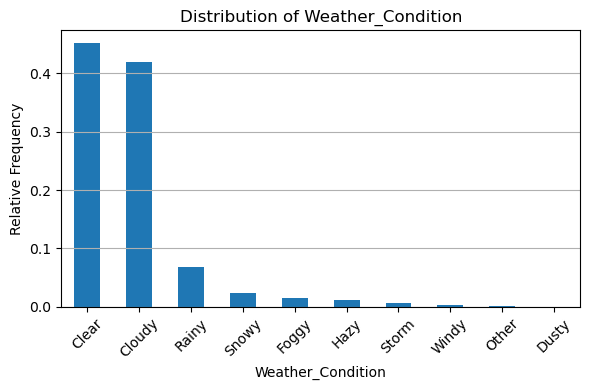

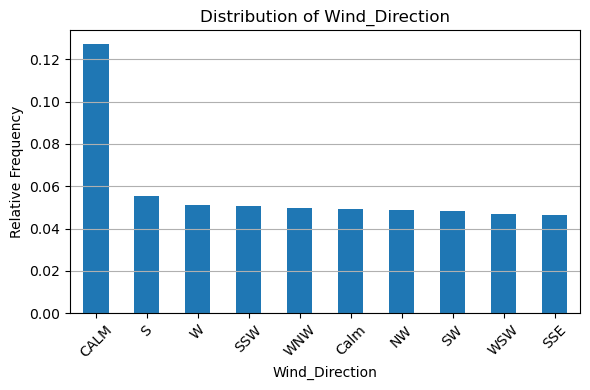

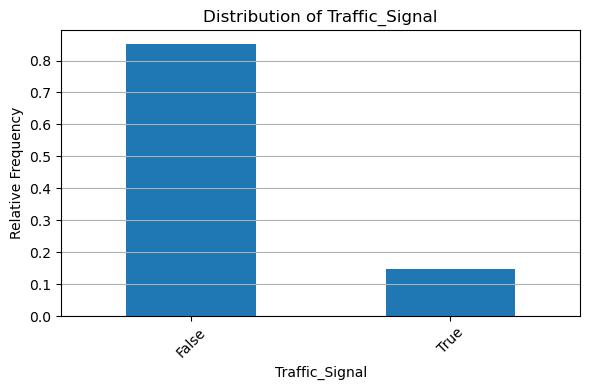

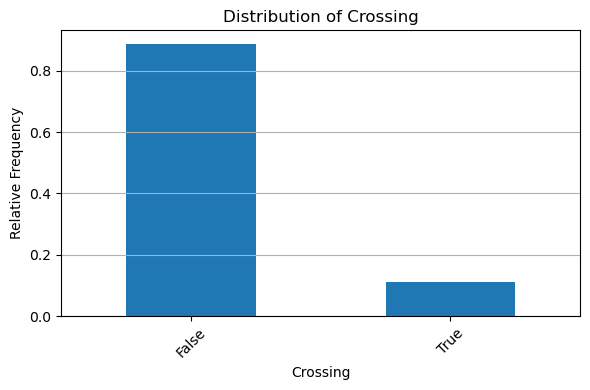

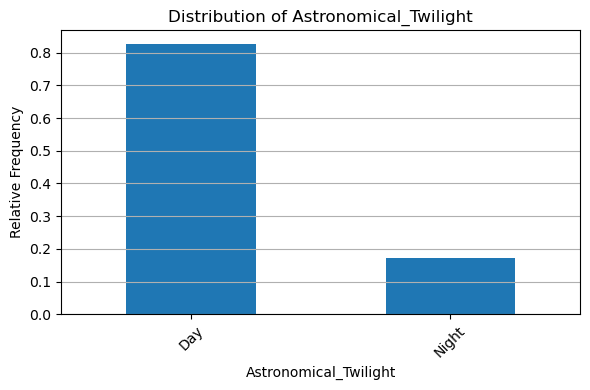

In [43]:
categorical_cols = ['Weather_Condition','Wind_Direction', 'Traffic_Signal', 'Crossing', 'Astronomical_Twilight']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Relative Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


# Feature Engineering
we add some new features from our features and then we remove outliers and do skewing for non linear features

In [44]:
df.drop(columns=['ID','Street', 'City', 'Country', 'Zipcode', 'Timezone', 'Amenity','Bump' ,'Give_Way' ,'Railway' ,'Turning_Loop', 'Airport_Code', 'Source','Weather_Timestamp', 'Description', 'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],inplace=True)

In [45]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'],format='mixed')

# Feature extraction
df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
df['year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday  
df['Month'] = df['Start_Time'].dt.month
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

df.drop(columns=['Start_Time', 'End_Time'], inplace=True)

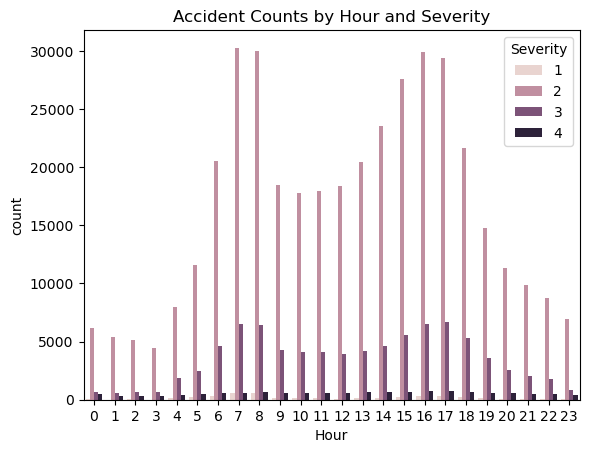

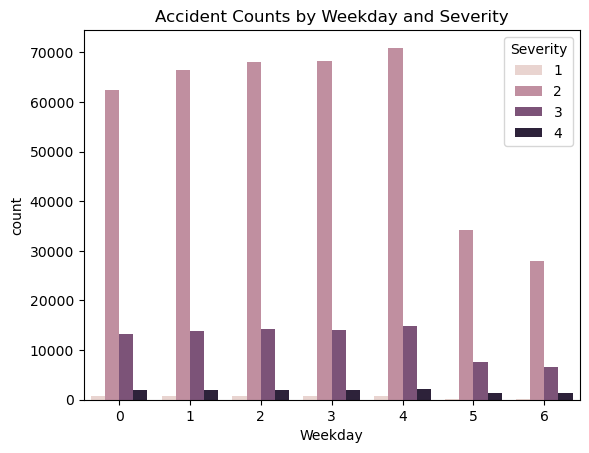

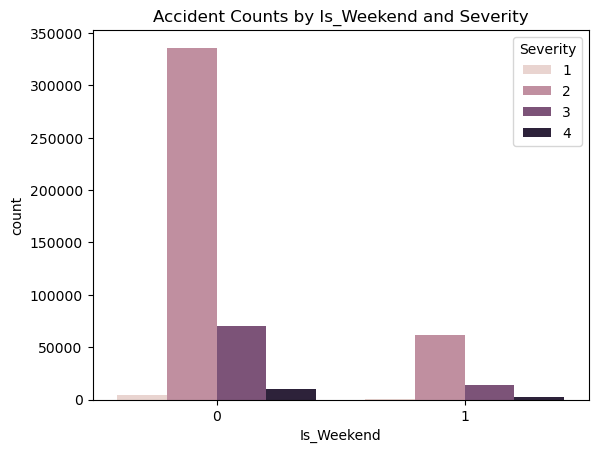

In [46]:
sns.countplot(x='Hour', hue='Severity', data=df)
plt.title("Accident Counts by Hour and Severity")
plt.show()
sns.countplot(x='Weekday', hue='Severity', data=df)
plt.title("Accident Counts by Weekday and Severity")
plt.show()
sns.countplot(x='Is_Weekend', hue='Severity', data=df)
plt.title("Accident Counts by Is_Weekend and Severity")
plt.show()

In [47]:
monthly_counts = df['Month'].value_counts().sort_index().reset_index()
monthly_counts.columns = ['Month', 'Accident Count']

fig_month = px.bar(monthly_counts, x='Month', y='Accident Count',
                   title='Monthly Accident Frequency',
                   width=1000, height=500)
fig_month.update_layout(xaxis=dict(tickmode='linear'))
fig_month.show()

In [48]:
yearly_counts = df['year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['year', 'Accident Count']

fig_year = px.bar(yearly_counts, x='year', y='Accident Count',
                  title='Yearly Accident Frequency',
                  width=1000, height=600)
fig_year.update_layout(xaxis=dict(tickmode='linear'))
fig_year.show()

In [49]:
df['Is_Weekend'] = df['Is_Weekend'].astype('bool')
df['Month'] = df['Month'].astype('category')
df['Weekday'] = df['Weekday'].astype('category')
df['State'] = df['State'].astype('category')
df['Hour'] = df['Hour'].astype('category')

In [50]:
df.dtypes

Severity                int64
Start_Lat             float64
Start_Lng             float64
End_Lat               float64
End_Lng               float64
Distance(mi)          float64
County                 object
State                category
Temperature(F)        float64
Wind_Chill(F)         float64
Humidity(%)           float64
Pressure(in)          float64
Visibility(mi)        float64
Wind_Direction         object
Wind_Speed(mph)       float64
Precipitation(in)     float64
Weather_Condition      object
Amenity                  bool
Bump                     bool
Crossing                 bool
Give_Way                 bool
Junction                 bool
No_Exit                  bool
Railway                  bool
Roundabout               bool
Station                  bool
Stop                     bool
Traffic_Calming          bool
Traffic_Signal           bool
Turning_Loop             bool
Sunrise_Sunset         object
Duration_Minutes      float64
year                    int32
Hour      

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           500000 non-null  int64   
 1   Start_Lat          500000 non-null  float64 
 2   Start_Lng          500000 non-null  float64 
 3   End_Lat            279623 non-null  float64 
 4   End_Lng            279623 non-null  float64 
 5   Distance(mi)       500000 non-null  float64 
 6   County             500000 non-null  object  
 7   State              500000 non-null  category
 8   Temperature(F)     489534 non-null  float64 
 9   Wind_Chill(F)      370983 non-null  float64 
 10  Humidity(%)        488870 non-null  float64 
 11  Pressure(in)       491072 non-null  float64 
 12  Visibility(mi)     488709 non-null  float64 
 13  Wind_Direction     488803 non-null  object  
 14  Wind_Speed(mph)    463013 non-null  float64 
 15  Precipitation(in)  357384 non-null

In [52]:
# fill numeric columns whic has nan values with median grouping by year and month

In [53]:
df[['End_Lat', 'End_Lng']] = df[['End_Lat', 'End_Lng']].fillna(0)

In [54]:
columns_to_proccess = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
    'Precipitation(in)'
]
for col in columns_to_proccess:
    df[col] = df.groupby(['year', 'Month'])[col].transform(lambda x: x.fillna(x.median()))

In [55]:
# remove outliers

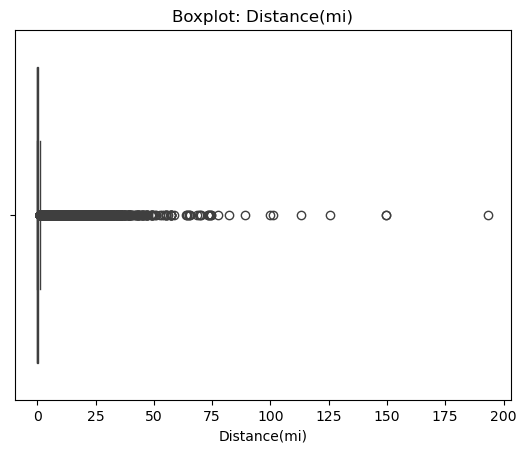

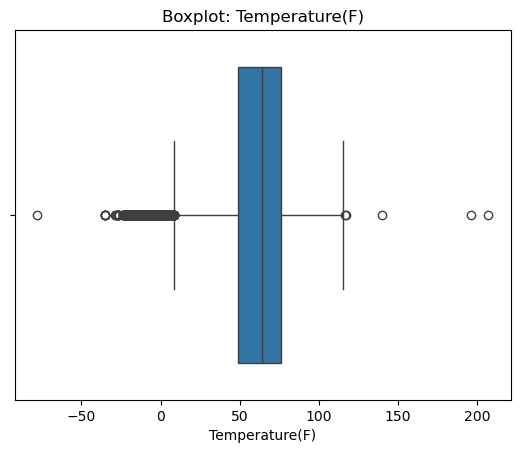

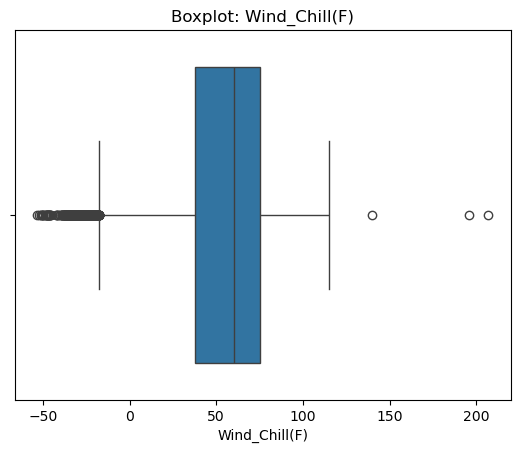

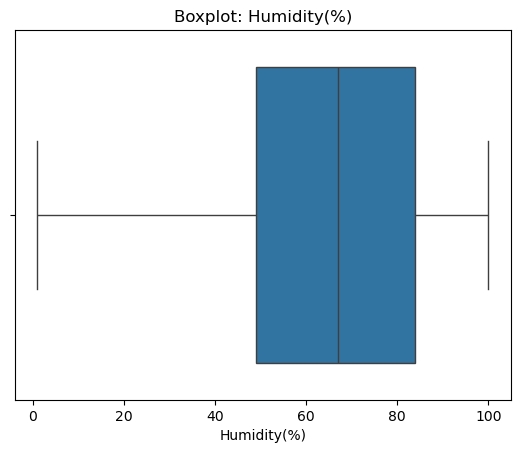

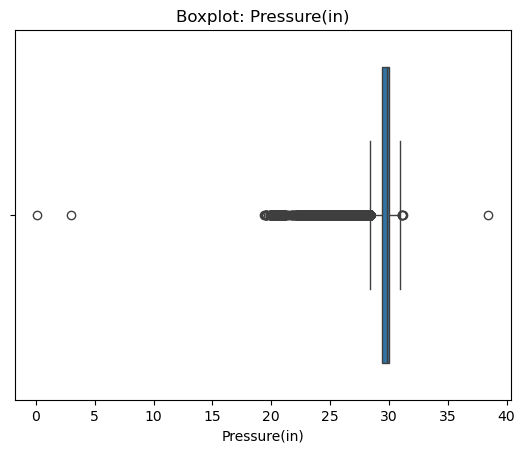

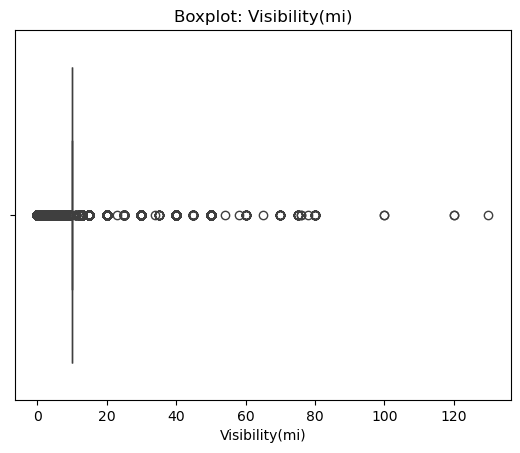

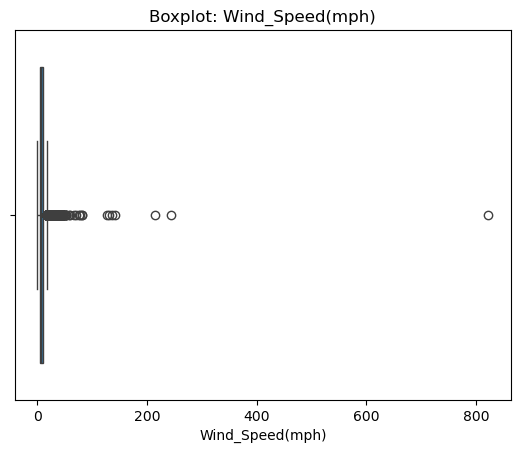

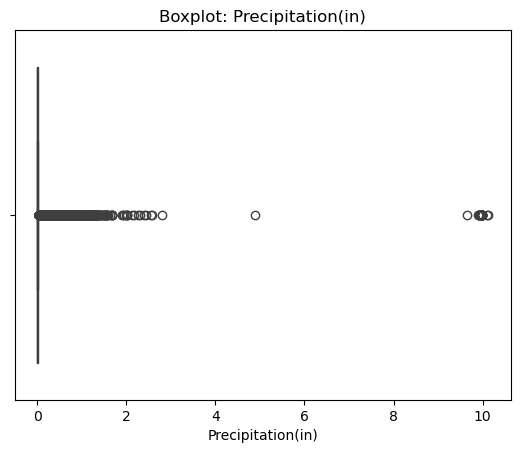

In [56]:
for col in ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


In [57]:
columns_to_clip = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Pressure(in)', 'Wind_Speed(mph)']  

for col in columns_to_clip:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

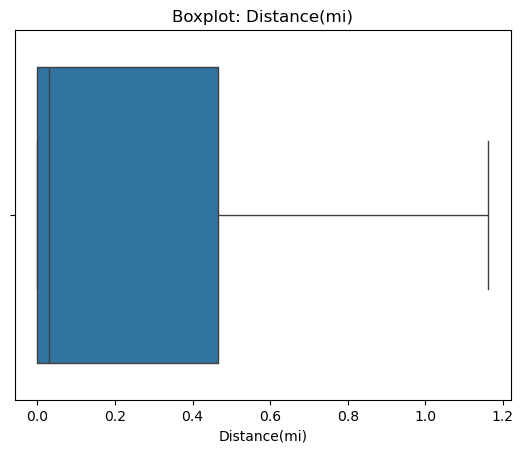

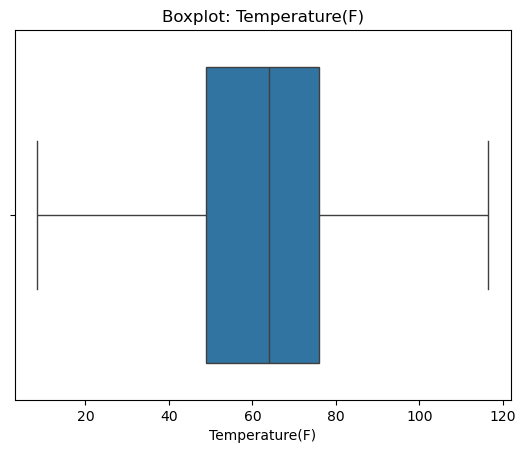

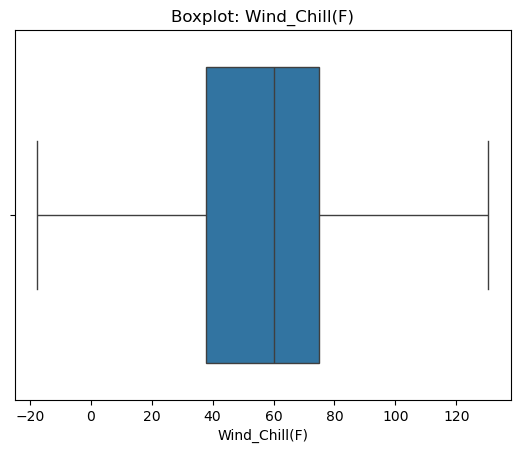

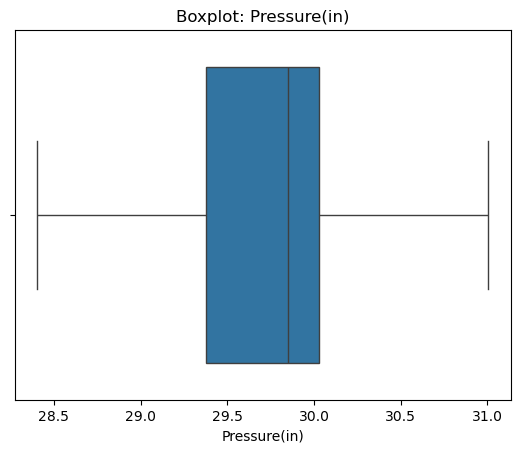

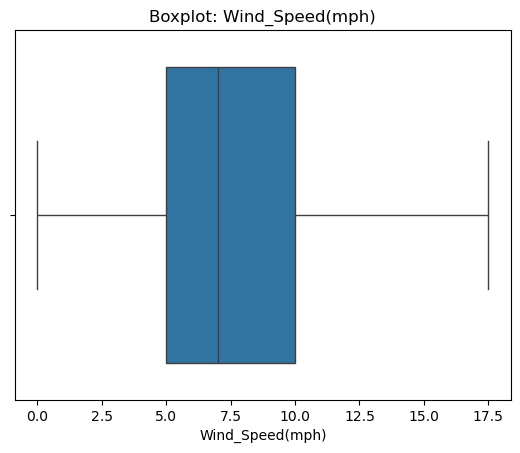

In [58]:
for col in ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Pressure(in)', 'Wind_Speed(mph)']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

In [59]:
Q1 = df['Visibility(mi)'].quantile(0.01)
Q3 = df['Visibility(mi)'].quantile(0.99)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['Visibility(mi)'] = np.clip(df['Visibility(mi)'], lower, upper)

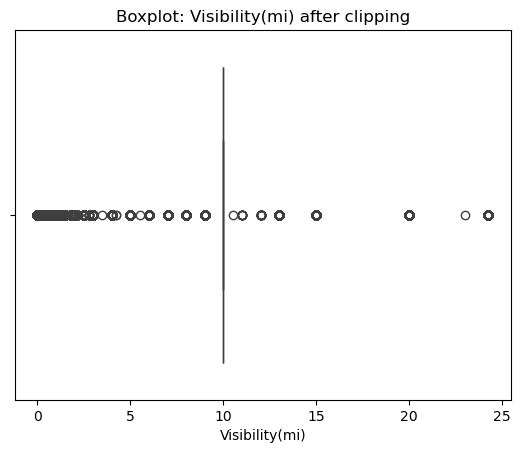

In [60]:
sns.boxplot(x=df['Visibility(mi)'])
plt.title("Boxplot: Visibility(mi) after clipping")
plt.show()

In [61]:
print(df['Visibility(mi)'].describe())
print(df['Visibility(mi)'].nunique())
print(df['Visibility(mi)'].value_counts().sort_index())

count    500000.000000
mean          9.088560
std           2.400675
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          24.250000
Name: Visibility(mi), dtype: float64
47
Visibility(mi)
0.00        518
0.06         17
0.10         64
0.12        133
0.19          3
0.20        767
0.25       1745
0.38         23
0.40          5
0.50       2347
0.60          8
0.63         21
0.70          1
0.75       1359
0.80        559
0.88         14
0.90          1
1.00       6631
1.10          5
1.20        437
1.40          4
1.50        726
1.80        560
1.90          2
2.00       7878
2.20          5
2.50       1199
2.80          8
3.00       7491
3.50          1
4.00       7721
4.20          2
5.00       9435
5.50          1
6.00       8181
7.00      14150
8.00       9643
9.00      12378
10.00    403966
10.50         1
11.00         7
12.00        24
13.00       627
15.00       389
20.00       280
23.00         1
24.25       662
Name: cou

In [62]:
upper = df['Precipitation(in)'].quantile(0.99)

df['Precipitation(in)'] = df['Precipitation(in)'].clip(upper=upper)

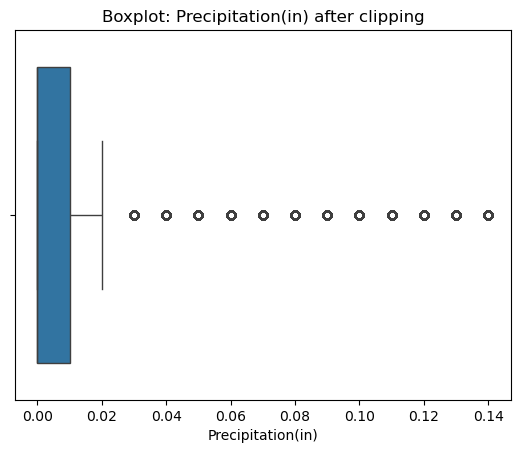

In [63]:
sns.boxplot(x=df['Precipitation(in)'])
plt.title("Boxplot: Precipitation(in) after clipping")
plt.show()

In [64]:
df['Wind_Direction'] = df['Wind_Direction'].str.upper().str.strip()

mapping = {
    'CALM': 'CALM',
    'VAR': 'VAR',
    'VARIABLE': 'VAR',
    'WEST': 'W',
    'EAST': 'E',
    'NORTH': 'N',
    'SOUTH': 'S'
    
}
df['Wind_Direction'] = df['Wind_Direction'].replace(mapping)
df['Wind_Direction'] = df['Wind_Direction'].replace('VAR', np.nan)

In [65]:
print(df['Wind_Direction'].unique())
print(df['Wind_Direction'].nunique())

['NW' 'W' 'ENE' 'CALM' 'SW' nan 'S' 'E' 'WSW' 'NNE' 'N' 'ESE' 'NNW' 'SSW'
 'WNW' 'NE' 'SE' 'SSE']
17


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           500000 non-null  int64   
 1   Start_Lat          500000 non-null  float64 
 2   Start_Lng          500000 non-null  float64 
 3   End_Lat            500000 non-null  float64 
 4   End_Lng            500000 non-null  float64 
 5   Distance(mi)       500000 non-null  float64 
 6   County             500000 non-null  object  
 7   State              500000 non-null  category
 8   Temperature(F)     500000 non-null  float64 
 9   Wind_Chill(F)      500000 non-null  float64 
 10  Humidity(%)        500000 non-null  float64 
 11  Pressure(in)       500000 non-null  float64 
 12  Visibility(mi)     500000 non-null  float64 
 13  Wind_Direction     465165 non-null  object  
 14  Wind_Speed(mph)    500000 non-null  float64 
 15  Precipitation(in)  500000 non-null

In [67]:
## (not severity)حيث وحدنا الكلاسات 1 و2 الى 0sampling هنا قمنا بعمل
##(severity) والكلاسات 3 و 4 الى 1
###sampling وهذه تعتبر من طرق ال 

In [68]:
# df['Severity'] = df['Severity'].replace({
#     1: 'Not Severity',
#     2: 'Not Severity',
#     3: 'Severity',
#     4: 'Severity'
# })

In [69]:
#for using xgboost

df['Severity'] = df['Severity'].replace({
    1: 0,
    2: 0,
    3: 1,
    4: 1
})

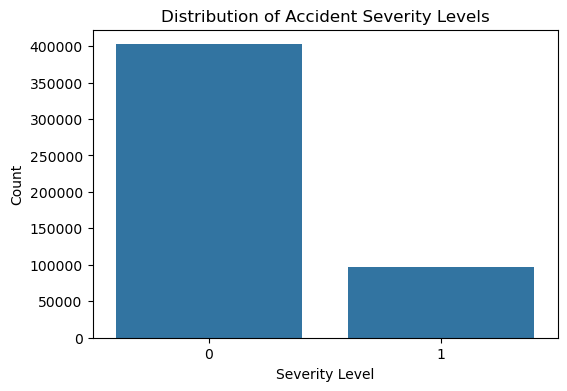

Severity
0    402416
1     97584
Name: count, dtype: int64


In [70]:
severity_counts = df['Severity'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title("Distribution of Accident Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

print(severity_counts)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           500000 non-null  int64   
 1   Start_Lat          500000 non-null  float64 
 2   Start_Lng          500000 non-null  float64 
 3   End_Lat            500000 non-null  float64 
 4   End_Lng            500000 non-null  float64 
 5   Distance(mi)       500000 non-null  float64 
 6   County             500000 non-null  object  
 7   State              500000 non-null  category
 8   Temperature(F)     500000 non-null  float64 
 9   Wind_Chill(F)      500000 non-null  float64 
 10  Humidity(%)        500000 non-null  float64 
 11  Pressure(in)       500000 non-null  float64 
 12  Visibility(mi)     500000 non-null  float64 
 13  Wind_Direction     465165 non-null  object  
 14  Wind_Speed(mph)    500000 non-null  float64 
 15  Precipitation(in)  500000 non-null

In [72]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
nonnumeric_columns = df.select_dtypes(exclude=[np.number]).columns
numeric_columns = [col for col in numeric_columns if col != 'Severity']
nonnumeric_columns = [col for col in nonnumeric_columns if col != 'Severity']

In [73]:
print(numeric_columns)

['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Duration_Minutes', 'year']


In [74]:
print(nonnumeric_columns)

['County', 'State', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Hour', 'Weekday', 'Month', 'Is_Weekend']


In [75]:
skewed_features = df[numeric_columns].skew().sort_values(ascending=False)
print("Skewed Features:\n", skewed_features)

Skewed Features:
 Duration_Minutes     57.277891
Precipitation(in)     5.697072
Distance(mi)          1.237247
Wind_Speed(mph)       0.291117
End_Lng               0.009996
Start_Lat            -0.073971
End_Lat              -0.105883
Wind_Chill(F)        -0.406671
Humidity(%)          -0.407098
year                 -0.437566
Temperature(F)       -0.444803
Start_Lng            -0.479194
Pressure(in)         -1.025114
Visibility(mi)       -1.876413
dtype: float64


In [76]:
qt = QuantileTransformer(output_distribution='normal')
pt = PowerTransformer(method='yeo-johnson')  
df['Precipitation(in)'] = qt.fit_transform(df[['Precipitation(in)']])
df['Distance(mi)'] = pt.fit_transform(df[['Distance(mi)']])
df['Duration_Minutes'] = pt.fit_transform(df[['Duration_Minutes']])
df['Wind_Speed(mph)'] = np.sqrt(df['Wind_Speed(mph)'])
df['Visibility(mi)'] = qt.fit_transform(df[['Visibility(mi)']])
df['Pressure(in)'] = qt.fit_transform(df[['Pressure(in)']])

In [77]:
skewed_features = df[numeric_columns].skew().sort_values(ascending=False)
print("Skewed Features:\n", skewed_features)

Skewed Features:
 Precipitation(in)    1.088587
Distance(mi)         0.601814
Duration_Minutes     0.038951
End_Lng              0.009996
Start_Lat           -0.073971
End_Lat             -0.105883
Wind_Chill(F)       -0.406671
Humidity(%)         -0.407098
year                -0.437566
Temperature(F)      -0.444803
Start_Lng           -0.479194
Wind_Speed(mph)     -0.987768
Visibility(mi)      -1.244347
Pressure(in)        -1.831292
dtype: float64


# Pipeline,Data Balancing And Models

In [ ]:
##### Before Undersampling Method #####

In [78]:
X = df.drop(columns=['Severity'])
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

numeric_transformer = SklearnPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = SklearnPipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, nonnumeric_columns)
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [ ]:
# LogisticRegression Model

In [79]:
logistic_model = LogisticRegression(
    solver='lbfgs',       
    max_iter=5000,        
    C=1.0,              
    random_state=42
)

logistic_model.fit(X_train_preprocessed, y_train)

y_pred = logistic_model.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     80483
           1       0.66      0.42      0.52     19517

    accuracy                           0.84    100000
   macro avg       0.76      0.69      0.71    100000
weighted avg       0.83      0.84      0.83    100000



In [ ]:
# CatBoost Model

In [80]:
cat_model = CatBoostClassifier(
    iterations=10000,
    learning_rate=0.02,
    depth=8,
    task_type='GPU',
    random_state=42,
    verbose=1000,
    loss_function='Logloss'
)
cat_model.fit(X_train_preprocessed, y_train)

y_pred = cat_model.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

0:	learn: 0.6745486	total: 53.8ms	remaining: 8m 58s
1000:	learn: 0.2932401	total: 32.6s	remaining: 4m 53s
2000:	learn: 0.2766799	total: 1m 3s	remaining: 4m 14s
3000:	learn: 0.2680171	total: 1m 33s	remaining: 3m 38s
4000:	learn: 0.2614187	total: 2m 4s	remaining: 3m 6s
5000:	learn: 0.2560870	total: 2m 34s	remaining: 2m 34s
6000:	learn: 0.2512329	total: 3m 5s	remaining: 2m 3s
7000:	learn: 0.2467652	total: 3m 35s	remaining: 1m 32s
8000:	learn: 0.2426906	total: 4m 6s	remaining: 1m 1s
9000:	learn: 0.2388059	total: 4m 38s	remaining: 30.9s
9999:	learn: 0.2352785	total: 5m 11s	remaining: 0us
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     80483
           1       0.75      0.61      0.67     19517

    accuracy                           0.88    100000
   macro avg       0.83      0.78      0.80    100000
weighted avg       0.88      0.88      0.88    100000



In [ ]:
# XGBoost Model

In [81]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=10000,        
    max_depth=8,            
    learning_rate=0.03,        
    subsample=0.8,            
    colsample_bytree=0.8,     
    min_child_weight=1,      
    use_label_encoder=False,  
    eval_metric='logloss',   
    random_state=42
)
model.fit(
    X_train_preprocessed,
    y_train
)
y_pred = model.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     80483
           1       0.76      0.66      0.71     19517

    accuracy                           0.89    100000
   macro avg       0.84      0.80      0.82    100000
weighted avg       0.89      0.89      0.89    100000



In [ ]:
##### After Undersampling Method #####

In [77]:
X = df.drop(columns=['Severity'])
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

numeric_transformer = SklearnPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = SklearnPipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, nonnumeric_columns)
])
preprocessing_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("feature_selector", SelectPercentile(score_func=f_classif, percentile=50))  
])
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train,y_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# num_features = preprocessor.named_transformers_["num"].get_feature_names_out(numeric_columns)
# cat_features = preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(nonnumeric_columns)
# all_feature_names = list(num_features) + list(cat_features)

undersample = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_preprocessed, y_train)

print("Original:", Counter(y_train))
print("After undersampling:", Counter(y_train_resampled))

Original: Counter({0: 321933, 1: 78067})
After UnderSampling: Counter({0: 78067, 1: 78067})


In [83]:
# LogisticRegression Model

In [84]:
logistic2_model = LogisticRegression(
    solver='lbfgs',       
    max_iter=5000,        
    C=1.0,              
    random_state=42
)

logistic2_model.fit(X_train_resampled, y_train_resampled)

y_pred = logistic2_model.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     80483
           1       0.45      0.80      0.58     19517

    accuracy                           0.77    100000
   macro avg       0.70      0.78      0.71    100000
weighted avg       0.84      0.77      0.79    100000



In [85]:
# CatBoost Model

In [86]:
cat2_model = CatBoostClassifier(
    iterations=10000,
    learning_rate=0.02,
    depth=10,
    task_type='GPU',
    random_state=42,
    verbose=1000,
    loss_function='Logloss'
)
cat2_model.fit(X_train_resampled, y_train_resampled)

y_pred = cat2_model.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

0:	learn: 0.6822614	total: 190ms	remaining: 31m 42s
1000:	learn: 0.3563554	total: 37.4s	remaining: 5m 36s
2000:	learn: 0.3287305	total: 1m 12s	remaining: 4m 49s
3000:	learn: 0.3112172	total: 1m 48s	remaining: 4m 13s
4000:	learn: 0.2955835	total: 2m 24s	remaining: 3m 36s
5000:	learn: 0.2816182	total: 3m	remaining: 3m
6000:	learn: 0.2688906	total: 3m 37s	remaining: 2m 24s
7000:	learn: 0.2566885	total: 4m 13s	remaining: 1m 48s
8000:	learn: 0.2457440	total: 4m 49s	remaining: 1m 12s
9000:	learn: 0.2349838	total: 5m 28s	remaining: 36.4s
9999:	learn: 0.2248322	total: 6m 7s	remaining: 0us
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     80483
           1       0.54      0.89      0.67     19517

    accuracy                           0.83    100000
   macro avg       0.75      0.85      0.78    100000
weighted avg       0.88      0.83      0.84    100000



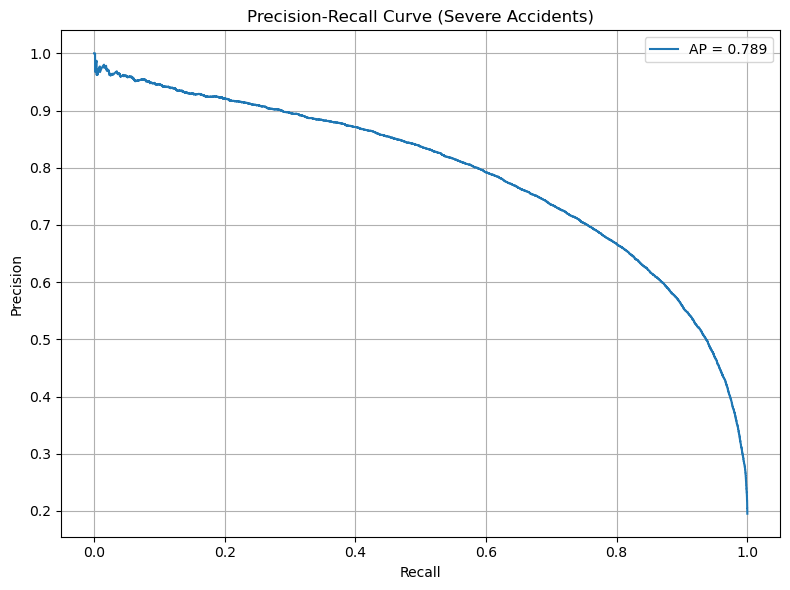

In [90]:
y_probs = model.predict_proba(X_test_preprocessed)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Severe Accidents)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
print(f"Best Threshold: {thresholds[best_idx]:.4f}")
print(f"Best F1: {f1_scores[best_idx]:.4f}")

Best Threshold: 0.3479
Best F1: 0.7278


In [78]:
# cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot(cmap='Blues')

In [ ]:
# XGBoost Model

In [93]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=10000,        
    max_depth=8,            
    learning_rate=0.03,        
    subsample=0.8,            
    colsample_bytree=0.8,     
    min_child_weight=1,        
    eval_metric='logloss',   
    random_state=42
)
model.fit(
    X_train_resampled,
    y_train_resampled
)
y_pred = model.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     80483
           1       0.56      0.89      0.69     19517

    accuracy                           0.84    100000
   macro avg       0.76      0.86      0.79    100000
weighted avg       0.89      0.84      0.85    100000



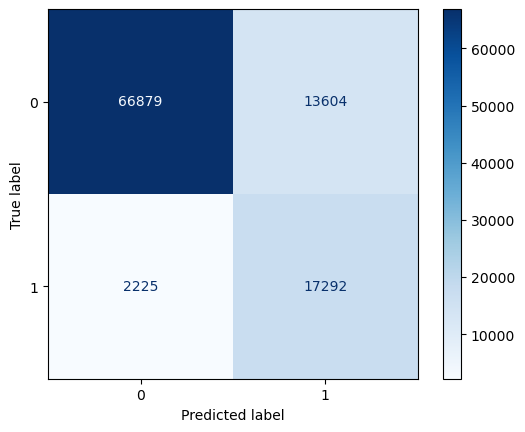

In [94]:
cm2 = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
disp.plot(cmap='Blues')

y_test unique: [0 1]
proba min/max: 2.0077075e-06 0.9995851


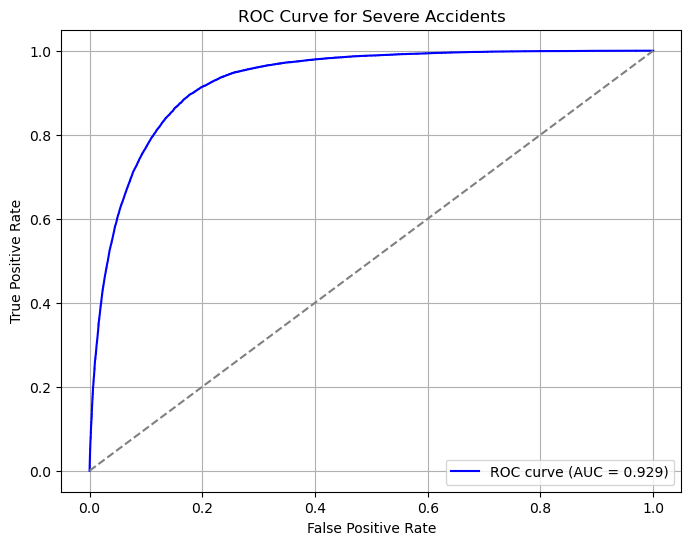

In [96]:
from sklearn.metrics import roc_curve, auc

y_test_bin = (y_test ).astype(int)

y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]

print("y_test unique:", y_test_bin.unique())
print("proba min/max:", y_pred_proba.min(), y_pred_proba.max())

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Severe Accidents')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

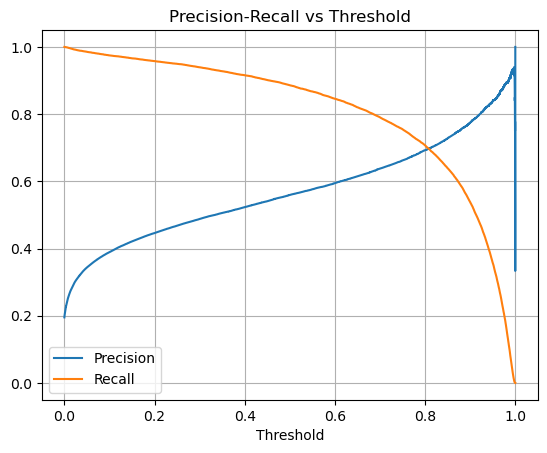

In [97]:
y_probs = model.predict_proba(X_test_preprocessed)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs, pos_label=1)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()

In [98]:
threshold = 0.64

y_scores = model.predict_proba(X_test_preprocessed)[:, 1]  

y_pred_thresh = (y_scores >= threshold).astype(int)

precision = precision_score(y_test, y_pred_thresh, pos_label=1)
recall = recall_score(y_test, y_pred_thresh, pos_label=1)

print(f"Threshold: {threshold}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Threshold: 0.64
Precision: 0.6107
Recall: 0.8266


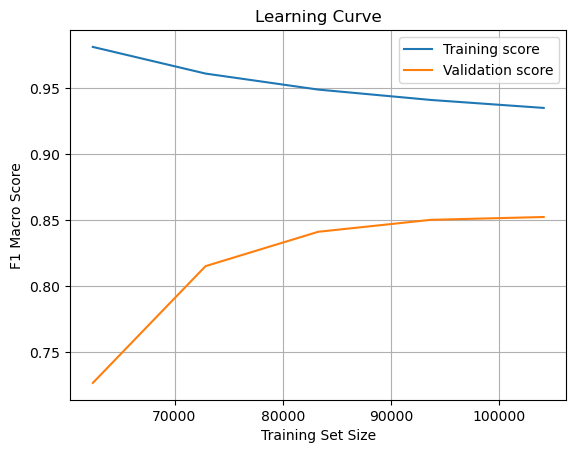

In [79]:
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier

train_sizes, train_scores, test_scores = learning_curve(
    estimator=XGBClassifier(
    n_estimators=10000,        
    max_depth=8,            
    learning_rate=0.01,        
    subsample=0.8,            
    colsample_bytree=0.8,     
    min_child_weight=1,        
    eval_metric='logloss',   
    random_state=42
),
    X=X_train_resampled,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    scoring='f1_macro',  
    n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Macro Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

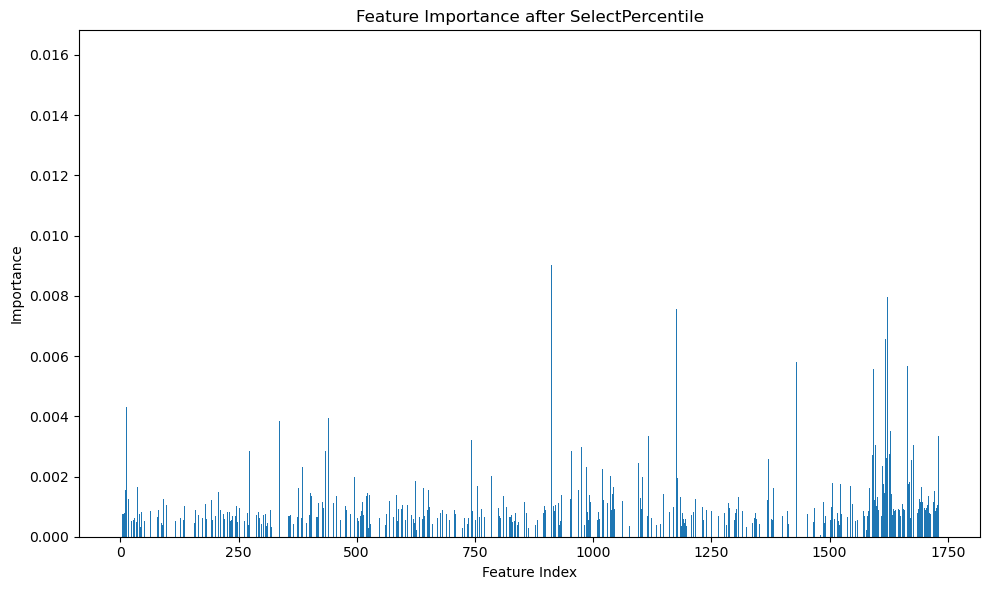

In [99]:
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance after SelectPercentile")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# booster = model.get_booster()
# raw_importance = booster.get_score(importance_type="gain")
# mapped_importance = {
#     all_feature_names[int(k[1:])]: v for k, v in raw_importance.items() if k.startswith("f")
# }

# importance_df = pd.DataFrame(mapped_importance.items(), columns=["Feature", "Importance"])
# importance_df = importance_df.sort_values(by="Importance", ascending=False)

# # Plot top 20 features
# plt.figure(figsize=(10, 8))
# plt.barh(importance_df["Feature"][:40][::-1], importance_df["Importance"][:40][::-1])
# plt.xlabel("Importance (Gain)")
# plt.title("Top 20 Feature Importances from XGBoost")
# plt.tight_layout()
# plt.show()

In [ ]:
#without grid search 

In [77]:
rf_model = RandomForestClassifier(
    n_estimators=500,        
    max_features=18,         
    random_state=42,        
    n_jobs=-1                 
)

rf_model.fit(
    X_train_resampled,
    y_train_resampled
)
y_pred = rf_model.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     80483
           1       0.49      0.86      0.62     19517

    accuracy                           0.80    100000
   macro avg       0.72      0.82      0.74    100000
weighted avg       0.87      0.80      0.82    100000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro', 
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)
y_pred = grid_search.predict(X_test_preprocessed)

print("Best parameters found:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#this is the result of grid search on random forrest(in image becaues we run it in other lab) ###

In [ ]:
# here we try oversmapling methods using smote and smotenc(without doing encode)

In [ ]:
# and also we try requency encoder for weather conditions features becaues it has 128 value before we do maping for its values

In [ ]:
# def frequency_encode(df, column):
#     freq = df[column].value_counts(normalize=True)
#     df[column + '_FE'] = df[column].map(freq)
#     return df

In [ ]:
# df = frequency_encode(df, 'Weather_Condition')

In [ ]:
# from imblearn.over_sampling import SMOTENC
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# from collections import Counter
# import numpy as np
# import pandas as pd
# import itertools
# from imblearn.over_sampling import SMOTENC

# X = df.drop(columns=['Severity'])
# y = df['Severity']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.2, random_state=42
# )

# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())  # optional
# ])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent'))
# ])

# preprocessor = ColumnTransformer([
#     ('num', numeric_transformer, numeric_columns),
#     ('cat', categorical_transformer, nonnumeric_columns)
# ])

# X_train_num = pd.DataFrame(numeric_transformer.fit_transform(X_train[numeric_columns]),
#                            columns=numeric_columns)

# X_train_cat = pd.DataFrame(categorical_transformer.fit_transform(X_train[nonnumeric_columns]),
#                            columns=nonnumeric_columns)

# X_train_pre_df = pd.concat([X_train_num, X_train_cat], axis=1)

# X_test_num = pd.DataFrame(numeric_transformer.transform(X_test[numeric_columns]),
#                           columns=numeric_columns)

# X_test_cat = pd.DataFrame(categorical_transformer.transform(X_test[nonnumeric_columns]),
#                           columns=nonnumeric_columns)

# X_test_pre_df = pd.concat([X_test_num, X_test_cat], axis=1)

# cat_indices = [X_train_pre_df.columns.get_loc(col) for col in nonnumeric_columns]

# k_neighbors_list = [3, 5, 7]

    
# smote_nc = SMOTENC(
#         categorical_features=cat_indices,
#         k_neighbors=5,
#         sampling_strategy={1: 15000, 3: 100000, 4: 70000},
#         random_state=42,
#         n_jobs=-1
#     )
    
  
# X_resampled, y_resampled = smote_nc.fit_resample(X_train_pre_df, y_train)

In [ ]:
# model = CatBoostClassifier(
#             iterations=10000,
#             learning_rate=0.02,
#             depth=12,
#             task_type='GPU',
#             random_state=42,
#             verbose=0,
#             loss_function='MultiClassOneVsAll'
#         )

# model.fit(X_resampled, y_resampled, cat_features=list(nonnumeric_columns), verbose=0)

# y_pred = model.predict(X_test_pre_df)

# report = classification_report(y_test, y_pred, output_dict=True)
# macro_f1 = report['macro avg']['f1-score']
# print(f"Macro F1-score: {macro_f1:.4f}")

# results.append({
#             'k_neighbors': 5,
#             'macro_f1': macro_f1
#         })

        
# results_df = pd.DataFrame(results)
# results_df = results_df.sort_values(by='macro_f1', ascending=False)
# print(results_df)

In [ ]:
# from imblearn.over_sampling import SMOTENC

# X = df.drop(columns=['Severity'])
# y = df['Severity']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.2, random_state=42
# )

# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     #('scaler', StandardScaler()) 
# ])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent'))
# ])

# preprocessor = ColumnTransformer([
#     ('num', numeric_transformer, numeric_columns),
#     ('cat', categorical_transformer, nonnumeric_columns)
# ])

# X_train_num = pd.DataFrame(numeric_transformer.fit_transform(X_train[numeric_columns]),
#                            columns=numeric_columns)

# X_train_cat = pd.DataFrame(categorical_transformer.fit_transform(X_train[nonnumeric_columns]),
#                            columns=nonnumeric_columns)

# X_train_pre_df = pd.concat([X_train_num, X_train_cat], axis=1)

# X_test_num = pd.DataFrame(numeric_transformer.transform(X_test[numeric_columns]),
#                           columns=numeric_columns)

# X_test_cat = pd.DataFrame(categorical_transformer.transform(X_test[nonnumeric_columns]),
#                           columns=nonnumeric_columns)

# X_test_pre_df = pd.concat([X_test_num, X_test_cat], axis=1)

# cat_indices = [X_train_pre_df.columns.get_loc(col) for col in nonnumeric_columns]


# target_1 = counts[1] + 3000  # 3000 more than original
# target_4 = counts[4] + 5000  # 5000 more than original
# smote = SMOTENC(categorical_features=cat_indices,k_neighbors=3,sampling_strategy={
#         1: 70000,   
#         4: 70000    
#     }, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train_pre_df, y_train)


# print("Before:", Counter(y_train))
# print("After SMOTENC:", Counter(y_resampled))

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report
# from sklearn.model_selection import GridSearchCV

# model = CatBoostClassifier(
#     iterations=40000,
#     learning_rate=0.02,
#     depth=15,
#     task_type='GPU',
#     random_state=42,
#     verbose=1000,
#     loss_function='MultiClass',
#     l2_leaf_reg=10,
#     auto_class_weights='Balanced',
#     min_data_in_leaf=10, 
# )

# model.fit(
#     X_resampled,
#     y_resampled,
#     cat_features=list(nonnumeric_columns),
#     eval_set=(X_test_pre_df, y_test),
#     early_stopping_rounds=300 
# )

# y_pred = model.predict(X_test_pre_df)

# print(classification_report(y_test, y_pred))